In [1]:
import random
import numpy as np
from tqdm import tqdm
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import rl_utils
import args

from env import DemoStepEnv
from ddpg import DDPG

DEBUG:matplotlib:matplotlib data path: d:\miniconda3\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\1\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:CACHEDIR=C:\Users\1\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\1\.matplotlib\fontlist-v330.json


In [58]:
from model import get_vit


num_episodes = 6000
minimal_size = 1000
batch_size = 64
buffer_size = 10000


env_name = 'MyEnv'
env = DemoStepEnv(10, 3, 15, [5]*10)
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
replay_buffer = rl_utils.ReplayBuffer(buffer_size)
state_dim = 10+1
action_dim = 1
agent = DDPG(
    state_dim=state_dim,
    action_dim=action_dim, **args.AGENT, warmup=0, device='cpu'
)

return_list, best_reward, best_s, r, s  = rl_utils.train_off_policy_agent(env, agent, num_episodes, replay_buffer, minimal_size, batch_size)

Iteration 9: 100%|██████████| 600/600 [00:47<00:00, 12.54it/s, episode=6000, return=-0.380]


In [59]:
rl = return_list[0:-1:10]

In [60]:
def norm(rl):
    _max, _min = max(rl), min(rl)
    return [(v-_min)/(_max-_min) for v in rl]

def scale(_min, _max, rl):
    return [v*(_max-_min)+_min for v in rl]

In [63]:
rl = scale(-1, 1.2, norm(rl))

DEBUG:matplotlib.backends.backend_pdf:Assigning font /F1 = 'C:\\Windows\\Fonts\\times.ttf'
DEBUG:matplotlib.backends.backend_pdf:Embedding font C:\Windows\Fonts\times.ttf.
DEBUG:matplotlib.backends.backend_pdf:Writing TrueType font.


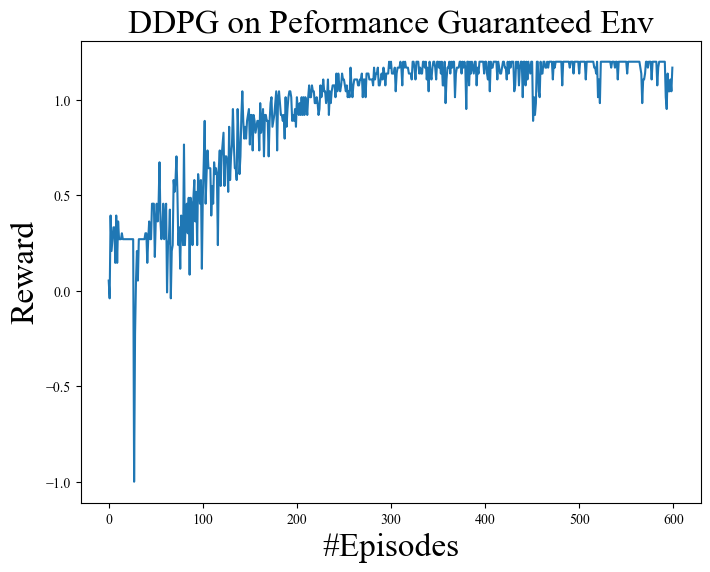

In [64]:
episodes_list = list(range(len(rl)))
plt.plot(episodes_list, rl, linewidth=1.5)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.sans-serif'] = 'times new roman'
plt.title('DDPG on Peformance Guaranteed Env', fontsize=24)
plt.xlabel('#Episodes', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.savefig('rl-train-1.pdf')
plt.show()